# Iris Data Visualization and Clustering

###### May, 2020

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('iris/iris.csv')
df.shape

(150, 6)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns = ['Id'], inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = np.array(df.iloc[:, :4])
y = np.array(df.Species)

In [7]:
#sns.palplot(sns.color_palette("Set1", n_colors=3))

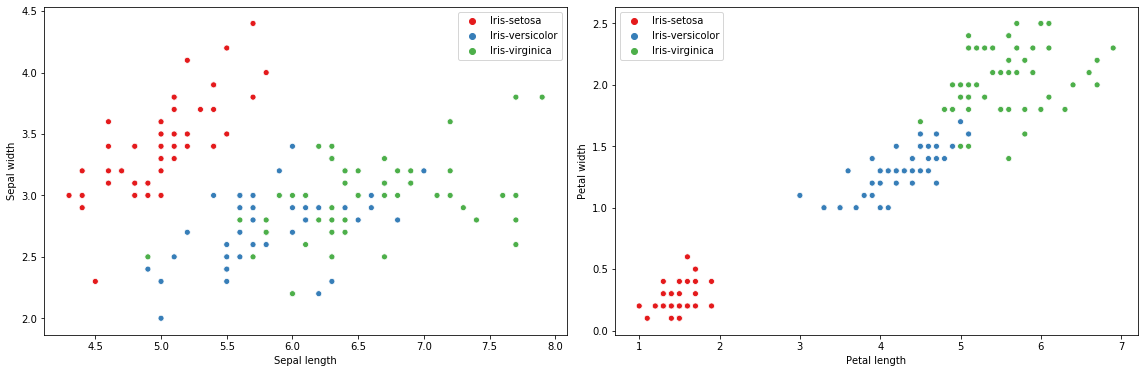

In [8]:
fig = plt.figure(figsize=(16,10))

#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
fig1 = fig.add_subplot(221);
ax = sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette="Set1")
ax.set(xlabel='Sepal length', ylabel='Sepal width')
#ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

#x_min, x_max = X[:, 2].min() - 1, X[:, 3].max() + 1
#y_min, y_max = X[:, 2].min() - 1, X[:, 3].max() + 1
fig2 = fig.add_subplot(222);
ax = sns.scatterplot(X[:, 2], X[:, 3], hue=y, palette="Set1")
ax.set(xlabel='Petal length', ylabel='Petal width')
#ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

plt.tight_layout()
plt.show()

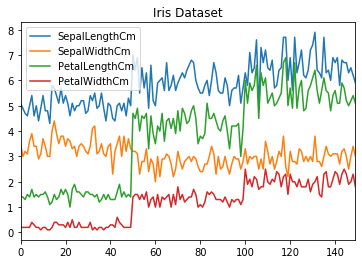

In [9]:
df.plot.line(title='Iris Dataset')
# .drop(['Species'], axis=1)

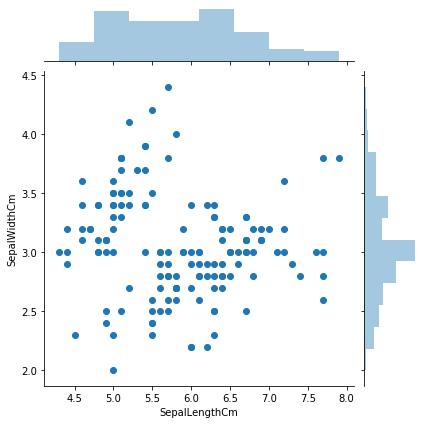

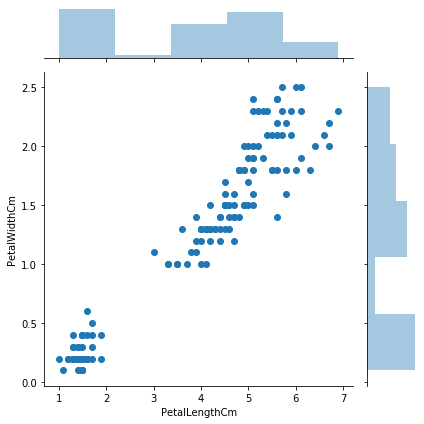

In [10]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, height=6)
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df, height=6)
plt.tight_layout()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

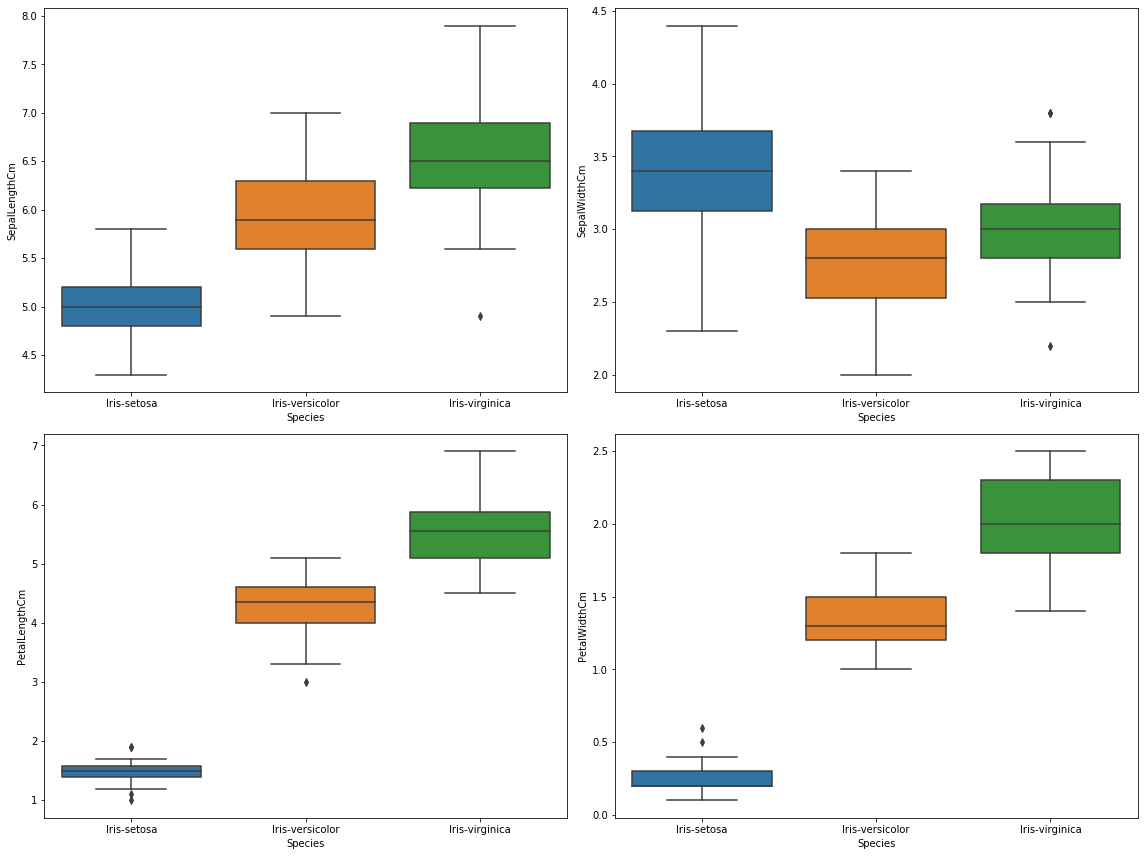

In [12]:
# We can look at an individual feature in Seaborn through a boxplot
fig = plt.figure(figsize=(16,12))

fig1 = fig.add_subplot(221);
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
fig2 = fig.add_subplot(222);
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
fig2 = fig.add_subplot(223);
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
fig2 = fig.add_subplot(224);
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.tight_layout()
plt.show()

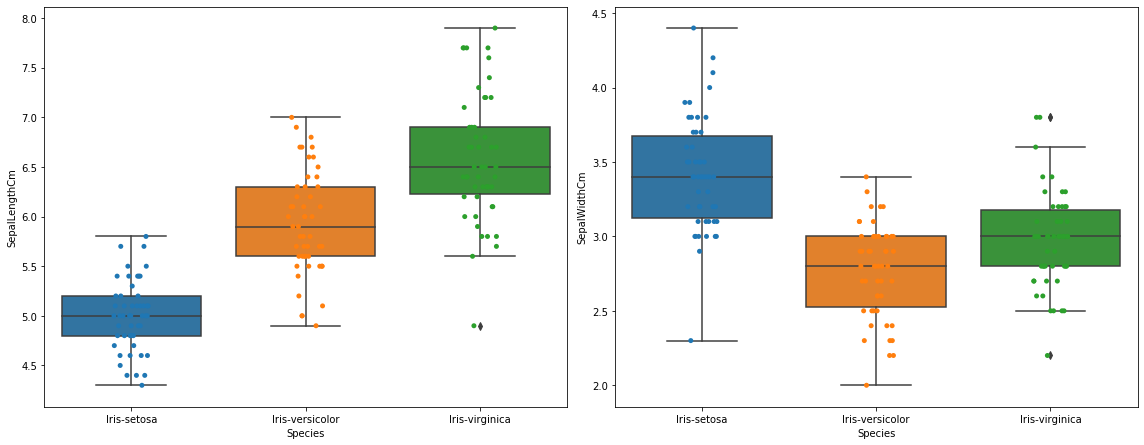

In [13]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
fig = plt.figure(figsize=(16,12))
fig1 = fig.add_subplot(221);
ax = sns.boxplot(x='Species', y='SepalLengthCm', data=df)
ax = sns.stripplot(x='Species', y='SepalLengthCm', data=df, jitter=True, edgecolor="gray")

fig2 = fig.add_subplot(222);
ax = sns.boxplot(x='Species', y='SepalWidthCm', data=df)
ax = sns.stripplot(x='Species', y='SepalWidthCm', data=df, jitter=True, edgecolor="gray")

plt.tight_layout()
plt.show()

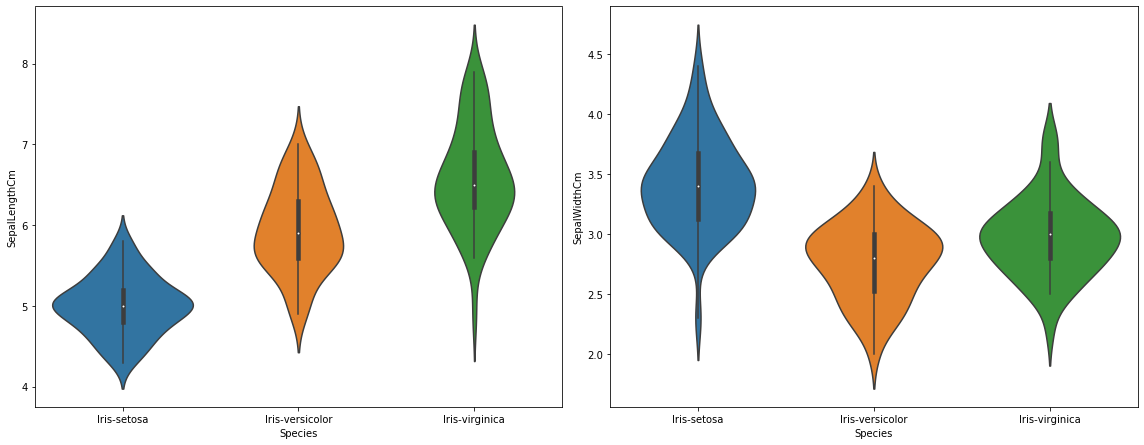

In [14]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
fig = plt.figure(figsize=(16,12))
fig1 = fig.add_subplot(221);
sns.violinplot(x="Species", y='SepalLengthCm', data=df, size=6)
fig1 = fig.add_subplot(222);
sns.violinplot(x="Species", y='SepalWidthCm', data=df, size=6)

plt.tight_layout()
plt.show()

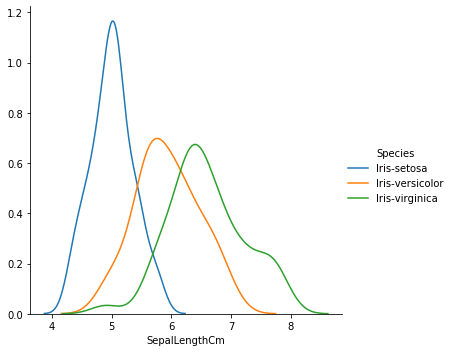

In [15]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(df, hue="Species", height=5).map(sns.kdeplot, "SepalLengthCm").add_legend()

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


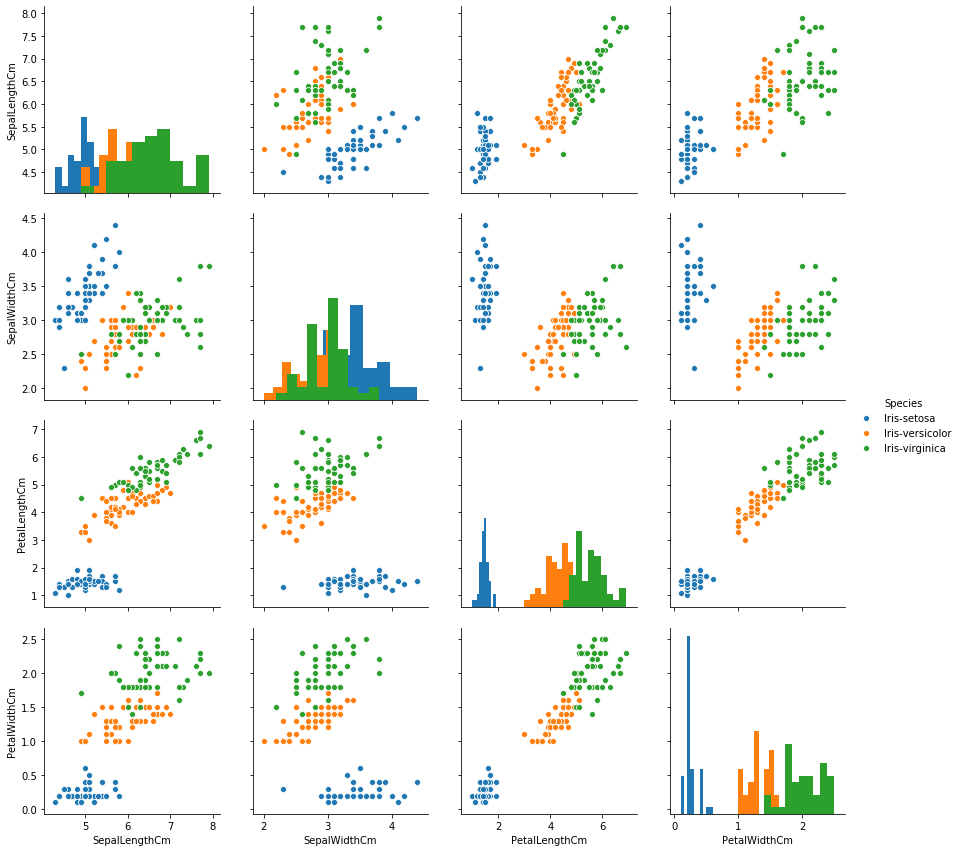

In [17]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df, hue="Species", height=3, diag_kind="hist")

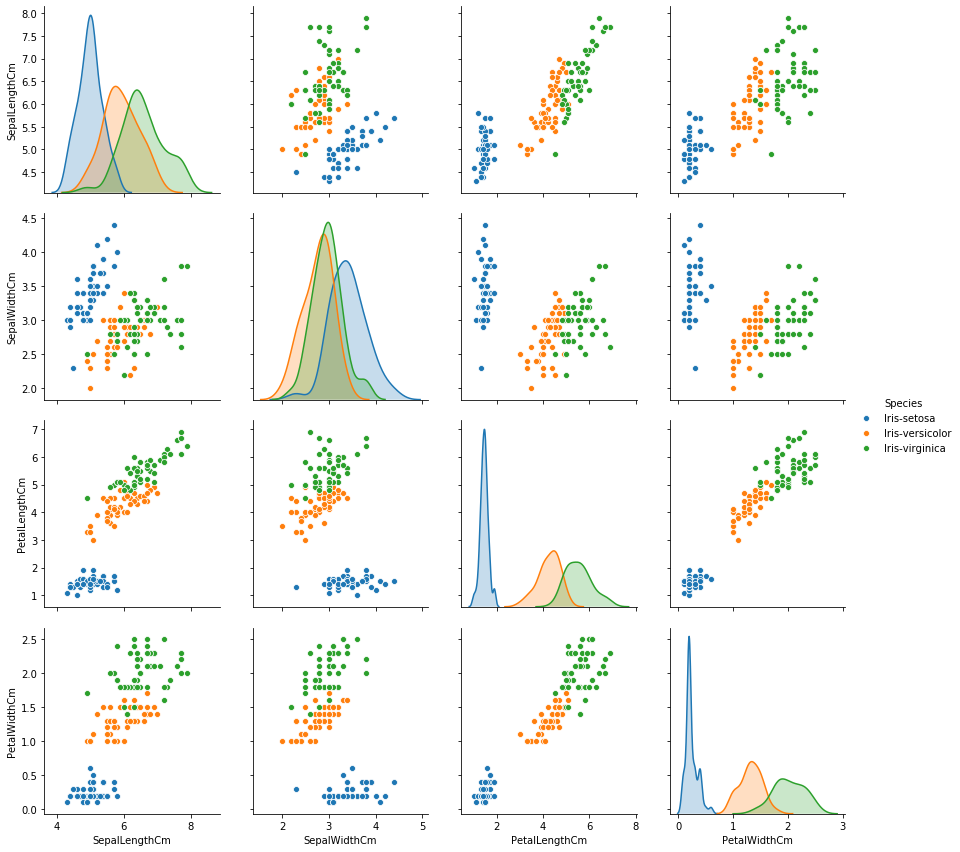

In [18]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df, hue="Species", height=3, diag_kind="kde")

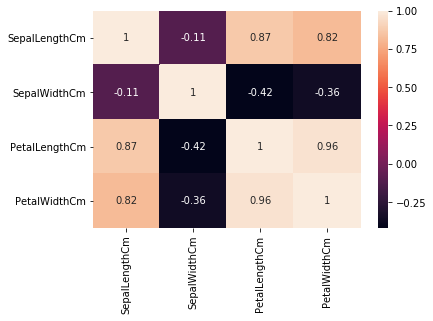

In [19]:
# correlation heatmap
sns.heatmap(df.corr(), annot=True)

In [20]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
df.SepalLengthCm > df.SepalLengthCm.mean()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120     True
121    False
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142    False
143     True
144     True
145     True
146     True
147     True
148     True
149     True
Name: SepalLengthCm, Length: 150, dtype: bool

In [22]:
aboveMeanSL = df.Species[df.SepalLengthCm > df.SepalLengthCm.mean()]
aboveMeanSL.value_counts()

Iris-virginica     44
Iris-versicolor    26
Name: Species, dtype: int64

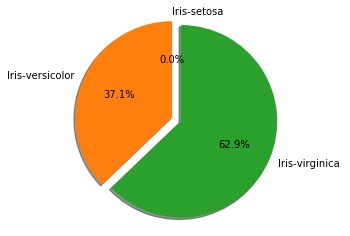

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sizes = [0,26,44]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

[0.08 0.02 0.12 0.1  0.24 0.16 0.08 0.1  0.04 0.06]
[4.3  4.45 4.6  4.75 4.9  5.05 5.2  5.35 5.5  5.65 5.8 ]


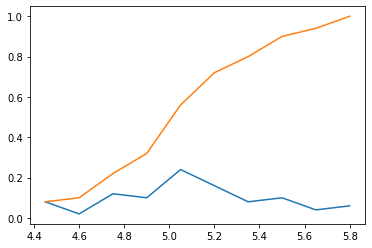

[0.02 0.   0.1  0.1  0.16 0.18 0.2  0.1  0.02 0.12]
[4.9 5.2 5.5 5.8 6.1 6.4 6.7 7.  7.3 7.6 7.9]


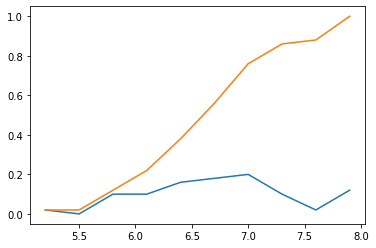

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


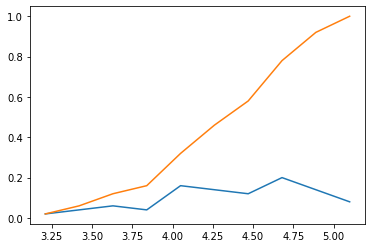

In [24]:
# setosa
iris_setosa = df[df.Species == 'Iris-setosa']
counts,bin_edges=np.histogram(iris_setosa['SepalLengthCm'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# virginica
iris_virginica = df[df.Species == 'Iris-virginica']
counts,bin_edges=np.histogram(iris_virginica["SepalLengthCm"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

# versicolor
iris_versicolor = df[df.Species == 'Iris-versicolor']
counts,bin_edges=np.histogram(iris_versicolor["PetalLengthCm"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

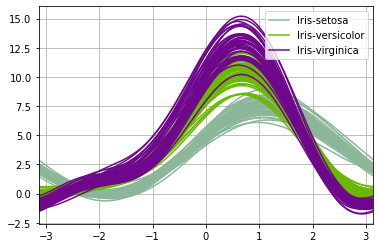

In [25]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

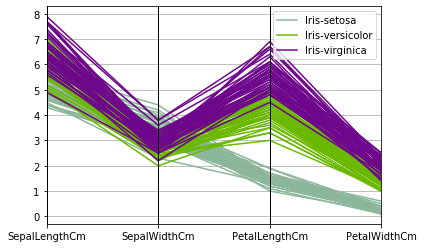

In [26]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "Species")

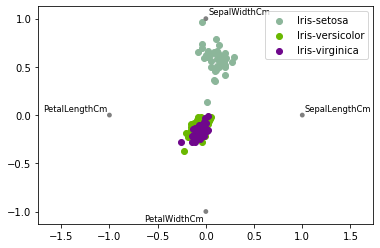

In [27]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(df, "Species")

###### classification

In [28]:
# PCA and Lda
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = df.copy()

pca = PCA(n_components=2)
iris['pca1'] = pca.fit(X).transform(X)[:, 0]
iris['pca2'] = pca.fit(X).transform(X)[:, 1]

lda = LDA(n_components=2)
iris['lda1'] = lda.fit(X, y).transform(X)[:, 0]
iris['lda2'] = lda.fit(X, y).transform(X)[:, 1]

In [29]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pca1,pca2,lda1,lda2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607,-8.084953,0.328454
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557,-7.147163,-0.755473
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346,-7.511378,-0.238078
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124,-6.837676,-0.642885
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925,-8.157814,0.540639


Text(0.5, 1.0, 'LDA')

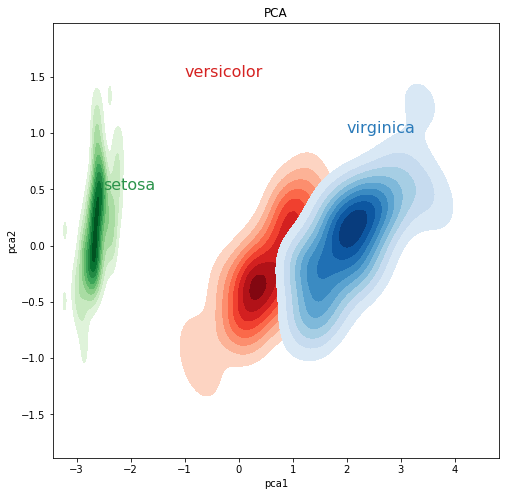

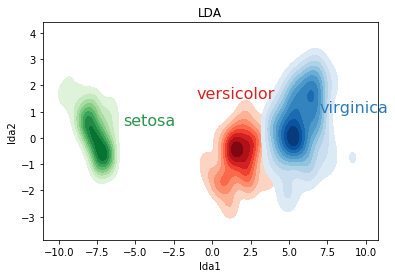

In [30]:
setosa = iris.query("Species=='Iris-setosa'")
versicolor = iris.query("Species=='Iris-versicolor'")
virginica = iris.query("Species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
plt.figure(1)
ax = sns.kdeplot(setosa.pca1, setosa.pca2, cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.pca1, versicolor.pca2, cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.pca1, virginica.pca2, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2, 1.0, "virginica", size=16, color=blue)
ax.text(-1, 1.5, "versicolor", size=16, color=red)
ax.text(-2.5, 0.5, "setosa", size=16, color=green)
ax.set_title('PCA')

plt.figure(2)
ax1 = sns.kdeplot(setosa.lda1, setosa.lda2, cmap="Greens",
          shade=True, shade_lowest=False)
ax1 = sns.kdeplot(versicolor.lda1, versicolor.lda2, cmap="Reds",
          shade=True, shade_lowest=False)
ax1 = sns.kdeplot(virginica.lda1, virginica.lda2, cmap="Blues",
          shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax1.text(7, 1.0, "virginica", size=16, color=blue)
ax1.text(-1, 1.5, "versicolor", size=16, color=red)
ax1.text(-5.8, 0.5, "setosa", size=16, color=green)
ax1.set_title('LDA')

In [31]:
#{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [32]:
iris['target']= iris.Species.astype("category").cat.codes

In [33]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pca1,pca2,lda1,lda2,target
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607,-8.084953,0.328454,0
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557,-7.147163,-0.755473,0
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346,-7.511378,-0.238078,0
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124,-6.837676,-0.642885,0
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925,-8.157814,0.540639,0


C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


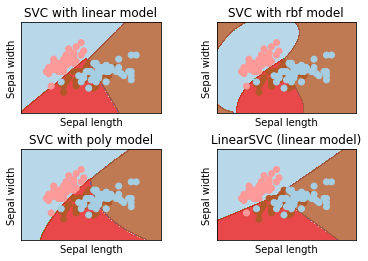

In [34]:
# SVM before LDA
from sklearn import svm
X = iris[['SepalLengthCm', 'SepalWidthCm']].values
y = iris['target'].values

h = 0.02
c = 1.0

# fit model
svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)

svc = svm.LinearSVC(C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']


plt.figure(3)
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y*100, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


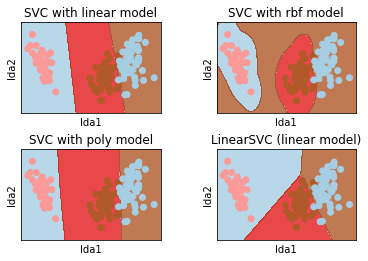

In [35]:
# SVM after LDA
from sklearn import svm
X = iris[['lda1', 'lda2']].values
y = iris['target'].values

h = 0.02
c = 1.0

# fit model
svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)

svc = svm.LinearSVC(C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']

plt.figure(3)
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y*100, cmap=plt.cm.Paired)
    plt.xlabel('lda1')
    plt.ylabel('lda2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [36]:
X = np.array(df.iloc[:, :4])
knn = KNeighborsClassifier(3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
y_pred = knn.predict(X)
confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

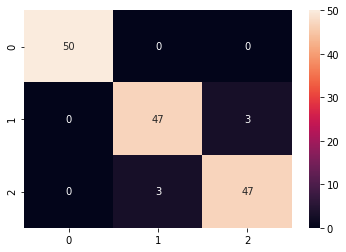

In [38]:
sns.heatmap(confusion_matrix(y_pred, y), cbar=True, annot=True)

###### unsupervised clustering

In [39]:
kmean = KMeans(n_clusters=3)
kmean.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmean.predict([[7.2, 3.5, 0.8, 1.6]]), kmean.predict([[5.2, 5, 2, 4]])

(array([0]), array([0]))

In [41]:
y_pred = kmean.predict(X)
confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

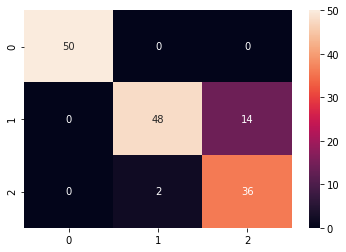

In [42]:
sns.heatmap(confusion_matrix(y_pred, y), cbar=True, annot=True)

In [43]:
# relabel by majority vote
y_kmeans_voted = y_pred.copy()
for i in range(3):
    n = np.argmax(np.bincount(y[y_pred == i]))
    print(i, 'in y_kmeans is', n, 'in y_test')
    y_kmeans_voted[y_pred == i] = n

0 in y_kmeans is 0 in y_test
1 in y_kmeans is 1 in y_test
2 in y_kmeans is 2 in y_test


In [44]:
confusion_matrix(y_kmeans_voted, y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

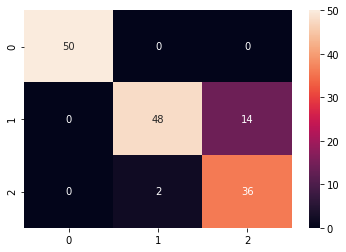

In [45]:
sns.heatmap(confusion_matrix(y_kmeans_voted, y), cbar=True, annot=True)